In [1]:
%matplotlib inline
from scipy.stats import rv_continuous
import numpy as np
import os
from numpy import radians as rad
from numpy import exp, sqrt, sin, cos
from scipy.integrate import quad
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import capLib as ca
import fdulib as vdf
import sys
plt.ion()
plt.close('all')

In [2]:
v_g = np.array([0., 220.,0.]) # galactic rotational velocity
v_s = np.array([10., 5., 7.]) # Sun proper motion
beta = np.array([rad(174.4697), rad(59.575), rad(29.812)]) # degrees->denotes eliptic lat
epsilon1 = np.array([-0.9931, -0.1170,0.01032])
epsilon2 = np.array([-0.067, 0.4927,-0.8676])
T = np.array([76.1, 156.3, 352.4]) # phases in days

In [3]:
v_Sun = 220.#vdf.v_Sun
v_esc = vdf.v_esc
v_0 = vdf.v_shm
sun = ca.get_Sun()
n1= vdf.get_n(vdf.shm_gal)
n2= vdf.get_n(vdf.mao_gal)
n3= vdf.get_n(vdf.lin_gal)
u_e = 29.79 # km/s fornengo 
e = 0.016722
lambda0 = rad(13.) # degrees
w = 2. * np.pi / 365.
v_0 = 220.
sigma = sqrt((v_0**2) / 2)
v_min = 0
v_max = 650
sigma_x = sigma
sigma_y = sigma
sigma_z = sigma
v_Sun = v_g + v_s
print v_Sun

[  10.  225.    7.]


/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [4]:
#def transform(x, u, f, es, sun):
#        v_S = vdf.v_Sun
#        if sun !=0:
#                v_S = sun
#        v = sqrt((u**2) + (v_S**2) + (2 * u * v_S * x))
#        return f(v) / v**2

print vdf.v_Sun

def gal_to_sun(u, f, q, v_0, lag, esc_sun=[vdf.v_esc, vdf.v_Sun]):
        def transform(x, u, f, es):
            v_S = 220.-lag
            v = sqrt((u**2) + (v_S**2) - (2 * u * v_S * x))
            return u**2*f(v, q, v_0)/v**2

        esc = esc_sun[0]
        sun = esc_sun[1]
        #n = integrate.quad(f, 0, v_e,args=(v_r,v_e))[0]
        result = integrate.quad(transform, -1, 1, args =(u, f, esc))[0]
        return  result


220.0


In [5]:
################## distributions ############
def tsallis(v,q,v_0):
    inside = (1 - ((1-q) * ((v)**2) / v_0**2))
    power = (q/(1-q))
    if inside >= 0:
        return 4 * np.pi * v**2 * inside**power
    else:
        return 0
    


def maxwellian_distribution(v,q,v_0):
    return (v**2/v_0**3)*exp(-3. * (v)**2 / (2. * v_0**2))



In [6]:
v_array = np.arange(0,700)
Tsallis = np.vectorize(tsallis)
Maxwellian = np.vectorize(maxwellian_distribution)
tu_Sun =  np.vectorize(gal_to_sun)



In [7]:
disc_GALsd= tu_Sun(v_array,tsallis,0.88,71.,50)
halo_GALsd = Tsallis(v_array,0.88,220.)

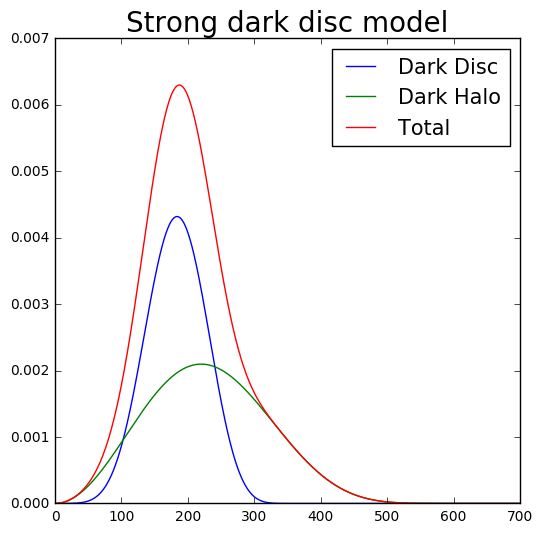

In [8]:
StronDarkDisc= (disc_GALsd/(2*sum(disc_GALsd))) + (halo_GALsd/(2*sum(halo_GALsd)))

fig, ax = plt.subplots(figsize=(6,6)) 
ax.set_title("Strong dark disc model", fontsize=20)
ax.plot(v_array,disc_GALsd/(2*sum(disc_GALsd)),label='Dark Disc')
ax.plot(v_array,halo_GALsd/(2*sum(halo_GALsd)),label='Dark Halo')
ax.plot(v_array,StronDarkDisc,label='Total')
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
frame = legend.get_frame()

In [9]:
disc_GALmd= tu_Sun(v_array,tsallis,0.7,200.,70.)
halo_GALmd = Tsallis(v_array,0.7,300.)

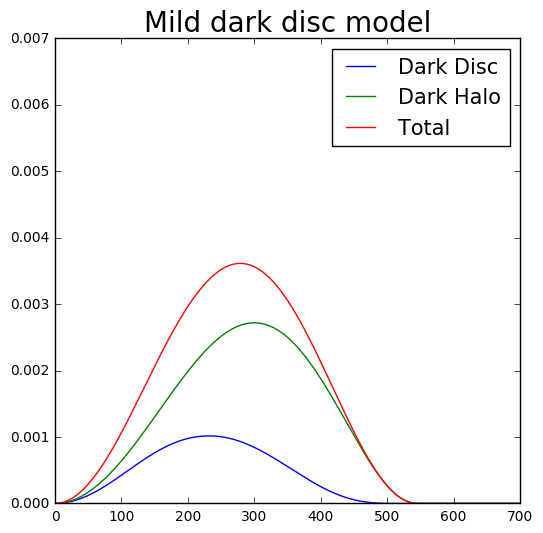

In [10]:
mildDarkDisc3= (disc_GALmd/(4*sum(disc_GALmd))) + (3*halo_GALmd/(4*sum(halo_GALmd)))

fig, ax = plt.subplots(figsize=(6,6)) 
ax.set_ylim([0,0.007])
ax.set_title("Mild dark disc model", fontsize=20)
ax.plot(v_array,disc_GALmd/(4*sum(disc_GALmd)),label='Dark Disc')
ax.plot(v_array,3*halo_GALmd/(4*sum(halo_GALmd)),label='Dark Halo')
ax.plot(v_array,mildDarkDisc3,label='Total')
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
frame = legend.get_frame()

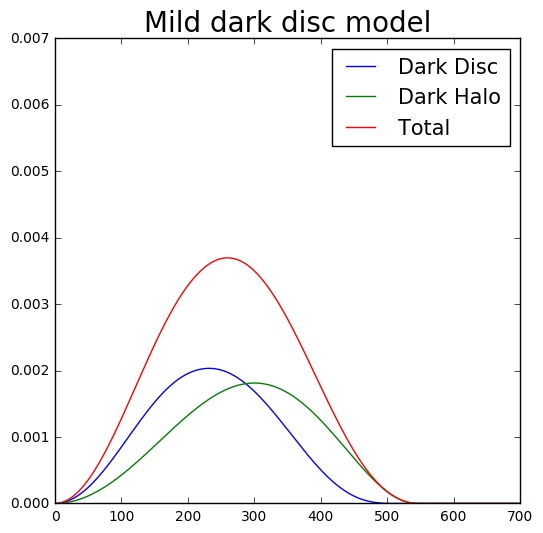

In [11]:
mildDarkDisc1= (disc_GALmd/(2*sum(disc_GALmd))) + (halo_GALmd/(2*sum(halo_GALmd)))

fig, ax = plt.subplots(figsize=(6,6)) 
ax.set_ylim([0,0.007])
ax.set_title("Mild dark disc model", fontsize=20)
ax.plot(v_array,disc_GALmd/(2*sum(disc_GALmd)),label='Dark Disc')
ax.plot(v_array,halo_GALmd/(2*sum(halo_GALmd)),label='Dark Halo')
ax.plot(v_array,mildDarkDisc1,label='Total')
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
frame = legend.get_frame()



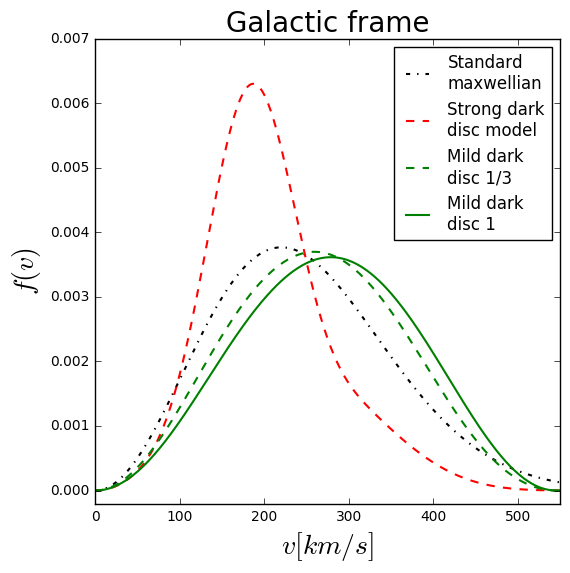

In [12]:
std_maxwellian = Maxwellian(v_array,0,270.)/sum(Maxwellian(v_array,0,270.))

fig, ax = plt.subplots(figsize=(6,6)) 
ax.set_ylim([-0.0002,0.007])
ax.set_xlim([0,550])
ax.set_ylabel(r'$f(v)$', fontsize=20)
ax.set_xlabel(r'$v [km/s]$', fontsize=20)
ax.set_title("Galactic frame", fontsize=20)
ax.plot(v_array,std_maxwellian, 'k-.', linewidth=1.5,label='Standard\nmaxwellian')
ax.plot(v_array,StronDarkDisc, 'r--',linewidth=1.5,label='Strong dark\ndisc model')
ax.plot(v_array,mildDarkDisc1,'g--',linewidth=1.5,label='Mild dark\ndisc 1/3 ')
ax.plot(v_array,mildDarkDisc3,'g-',linewidth=1.5,label='Mild dark\ndisc 1')
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=12)
frame = legend.get_frame()

In [13]:
halo_SUNsd = tu_Sun(v_array,tsallis,0.88,220,0)
disc_SUNsd = tu_Sun(v_array,tsallis,0.88,71.,170.)

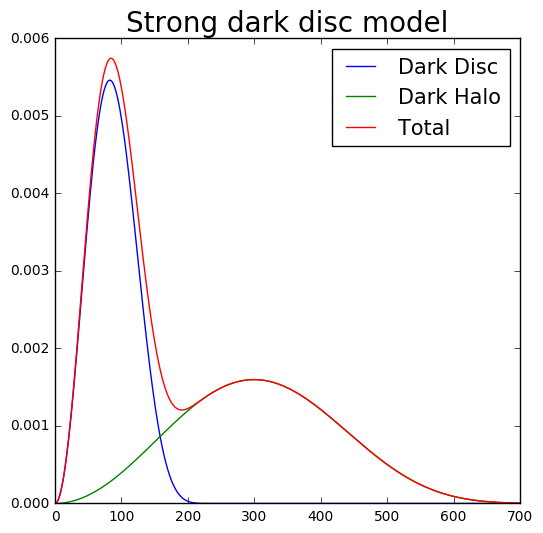

In [14]:
StronDarkDiscSUN= (disc_SUNsd/(2*sum(disc_SUNsd))) +(halo_SUNsd/(2*sum(halo_SUNsd)))

fig, ax = plt.subplots(figsize=(6,6)) 
ax.set_title("Strong dark disc model", fontsize=20)
ax.plot(v_array,disc_SUNsd/(2*sum(disc_SUNsd)),label='Dark Disc')
ax.plot(v_array,halo_SUNsd/(2*sum(halo_SUNsd)),label='Dark Halo')
ax.plot(v_array,StronDarkDiscSUN,label='Total')
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
frame = legend.get_frame()

In [15]:
disc_SUNmd= tu_Sun(v_array,tsallis,0.7,200.,150)
halo_SUNmd = tu_Sun(v_array,tsallis,0.7,300.,0)

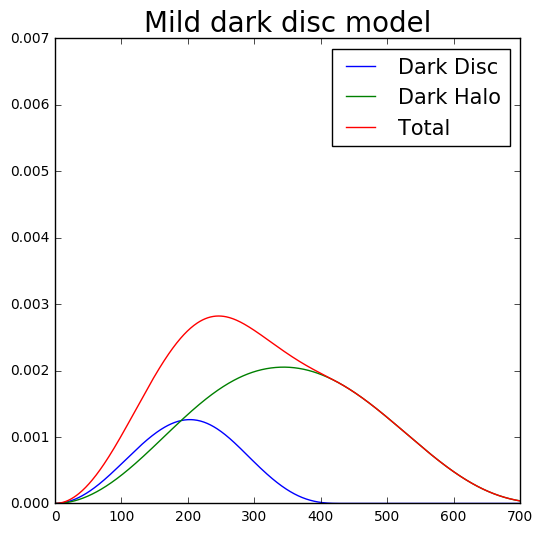

In [16]:
mildDarkDisc3SUN= (disc_SUNmd/(4*sum(disc_SUNmd))) + (3*halo_SUNmd/(4*sum(halo_SUNmd)))

fig, ax = plt.subplots(figsize=(6,6)) 
ax.set_ylim([0,0.007])
ax.set_title("Mild dark disc model", fontsize=20)
ax.plot(v_array,disc_SUNmd/(4*sum(disc_SUNmd)),label='Dark Disc')
ax.plot(v_array,3*halo_SUNmd/(4*sum(halo_SUNmd)),label='Dark Halo')
ax.plot(v_array,mildDarkDisc3SUN,label='Total')
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
frame = legend.get_frame()

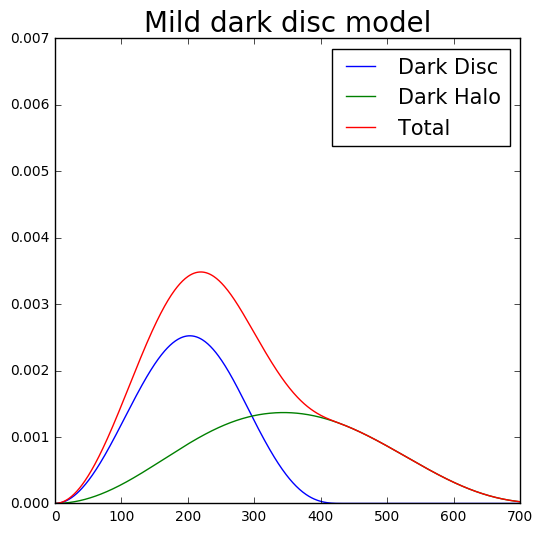

In [17]:
mildDarkDisc1SUN= (disc_SUNmd/(2*sum(disc_SUNmd))) + (halo_SUNmd/(2*sum(halo_SUNmd)))

fig, ax = plt.subplots(figsize=(6,6)) 
ax.set_ylim([0,0.007])
ax.set_title("Mild dark disc model", fontsize=20)
ax.plot(v_array,disc_SUNmd/(2*sum(disc_SUNmd)),label='Dark Disc')
ax.plot(v_array,halo_SUNmd/(2*sum(halo_SUNmd)),label='Dark Halo')
ax.plot(v_array,mildDarkDisc1SUN,label='Total')
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=15)
frame = legend.get_frame()

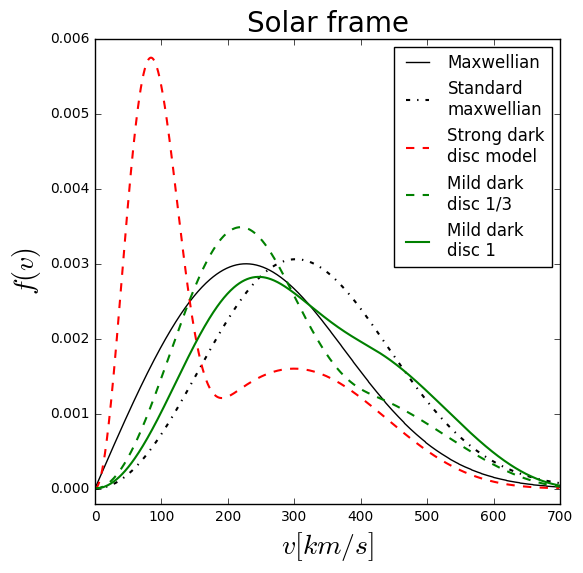

In [18]:
v_Sun = 220.
v_esc = 544.
x = [i for i in np.arange(0.1,v_Sun+v_esc)]
Sun=np.vectorize(vdf.gal_to_sun)
aux_maxwellian = tu_Sun(v_array,Maxwellian,0,270.,0)
std_maxwellianSUN = aux_maxwellian/sum(aux_maxwellian)

fig, ax = plt.subplots(figsize=(6,6)) 
ax.set_ylim([-0.0002,0.006])
ax.set_xlim([0,700])
ax.set_ylabel(r'$f(v)$', fontsize=20)
ax.set_xlabel(r'$v [km/s]$', fontsize=20)
ax.set_title("Solar frame", fontsize=20)

ax.plot(v_array, Sun(v_array,vdf.shm_gal)*n1,'k-', label='Maxwellian')
ax.plot(v_array,std_maxwellianSUN, 'k-.', linewidth=1.5,label='Standard\nmaxwellian')
ax.plot(v_array,StronDarkDiscSUN, 'r--',linewidth=1.5,label='Strong dark\ndisc model')
ax.plot(v_array,mildDarkDisc1SUN,'g--',linewidth=1.5,label='Mild dark\ndisc 1/3 ')
ax.plot(v_array,mildDarkDisc3SUN,'g-',linewidth=1.5,label='Mild dark\ndisc 1')
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=12)
frame = legend.get_frame()

strong dark disc model

In [19]:
## parameters given in LING2009 for the strong disc model
v0_Hsd, v0_Dsd, vlag_sd = 220., 50*sqrt(2), 50
q_sd = 0.88
## normalization factors in the galactic frame of references
n_sd = [quad(tsallis, 0.,700., args=(q_sd,v0_Hsd))[0],
        quad(gal_to_sun, 0.,700., args=(tsallis, q_sd, v0_Dsd, vlag_sd))[0],
        quad(gal_to_sun, 0.,700., args=(tsallis, q_sd, v0_Hsd, 0))[0],
        quad(gal_to_sun, 0.,700., args=(tsallis, q_sd, v0_Dsd, 220.-vlag_sd))[0]
       ]


mild dark disc model $\frac{\rho_D}{\rho_H} = \frac{1}{3} $

In [20]:
## parameters given in LING2009 for the mild disc model
v0_Hmd3, v0_Dmd3, vlag_md3 = 300., 200., 70.
q_md3 = 0.7
## normalization factors in galactic and solar frame of reference.
## structure [halo_gal, disc_gal, halo_sun, halo_sun]
## this might make a diferente in the following calculations
n_md3 = [quad(tsallis, 0.,700., args=(q_md3,v0_Hmd3))[0],
        quad(gal_to_sun, 0.,700., args=(tsallis, q_md3, v0_Dmd3, vlag_md3))[0],
        quad(gal_to_sun, 0.,700., args=(tsallis, q_md3, v0_Hmd3, 0))[0],
        quad(gal_to_sun, 0.,700., args=(tsallis, q_md3, v0_Dmd3, 220.- vlag_md3))[0]
       ]
#### standard maxwellian normalizations
n_max = [quad(maxwellian_distribution, 0.,700., args=(0,270.))[0],
         quad(gal_to_sun,0.,700.,args=(maxwellian_distribution,0,270,0))[0]]

In [21]:
def strong_DDSUN(v):
    halo = gal_to_sun(v, tsallis, q_sd, v0_Hsd, 0)
    disc = gal_to_sun(v, tsallis, q_sd, v0_Dsd, 220-vlag_sd)
    return (halo/(2*n_sd[2]))+(disc/(2*n_sd[3]))

def mild_DD3SUN(v):
    halo = gal_to_sun(v, tsallis, q_md3, v0_Hmd3, 0)
    disc = gal_to_sun(v, tsallis, q_md3, v0_Dmd3, 220-vlag_md3)
    return (3*halo/(4*n_md3[2]))+(disc/(4*n_md3[3]))

def mild_DD1SUN(v):
    halo = gal_to_sun(v, tsallis, q_md3, v0_Hmd3, 0)
    disc = gal_to_sun(v, tsallis, q_md3, v0_Dmd3, 220-vlag_md3)
    return (halo/(2*n_md3[2]))+(disc/(2*n_md3[3]))

def standard_maxwellian(v):
    return gal_to_sun(v,maxwellian_distribution,0,270.,0.)/ n_max[1]
    
def standard_maxwellianCHOI(v):
    return Sun(v,vdf.shm_gal)*n1/ n_max[1]


In [22]:
sun = ca.get_Sun()
print len(sun[0])

5


In [23]:
## capture
def captureFunctionSI(m,f,nuc):
    def integrand(v):
        return f(v) * ca.caprate_GOUSI(v, m, nuc) / v
    result=integrate.quad(integrand,0,v_esc)
    return result[0]

def captureSigma(m,f,nuc):
    def integrand(v):
        return f(v) * (ca.caprate_GOUSI(v, m, nuc)**2) / v**2
    result=integrate.quad(integrand,0,v_esc)
    return result[0]

def captureSHM_SI(m,nuc):
    def integrand(v):
        return vdf.gal_to_sun(v,vdf.shm_gal) * ca.caprate_GOUSI(v,m,nuc)
    result=integrate.quad(integrand,0,v_esc)
    return result[0]

def captureFunction(m,f):
    def integrand(v):
        return f(v) * ca.caprate_GOU(v,m) / v
    result=integrate.quad(integrand,0,v_esc)
    return result[0]

def captureSHM(m):
    def integrand(v):
        return vdf.gal_to_sun(v,vdf.shm_gal) * ca.caprate_GOU(v,m)
    result=integrate.quad(integrand,0,v_esc)
    return result[0]

In [24]:
SI = np.vectorize(captureFunctionSI)
SHMcapture = np.vectorize(captureSHM_SI)
m_array = np.logspace(0.1, 4, num=100)
result_disc = np.zeros(len(m_array))
re_mild1 = np.zeros(len(m_array))
re_mild3 = np.zeros(len(m_array))
result_SHM = np.zeros(len(m_array))


for i in range(0,len(sun)):
    print 'element--> ',sun[i][4]
    result_disc += SI(m_array,strong_DDSUN, i)
    result_SHM += SI(m_array,standard_maxwellianCHOI, i)
    re_mild1 += SI(m_array,mild_DD1SUN, i)
    re_mild3 += SI(m_array,mild_DD3SUN, i)
    

element-->  H


/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


element-->  He
element-->  Li
element-->  Be
element-->  B
element-->  C
element-->  N
element-->  O
element-->  F
element-->  Ne
element-->  Na
element-->  Mg
element-->  Al
element-->  Si
element-->  P
element-->  S
element-->  Cl
element-->  Ar
element-->  K
element-->  Ca
element-->  Sc
element-->  Ti
element-->  V
element-->  Cr
element-->  Mn
element-->  Fe
element-->  Co
element-->  Ni
element-->  Cu
element-->  Zn
element-->  Ga
element-->  Ge
element-->  Kr
element-->  Rb
element-->  Sr
element-->  Y
element-->  Zr
element-->  Nb
element-->  Mo
element-->  Ru
element-->  Rh
element-->  Pd
element-->  Ag
element-->  Cd
element-->  In
element-->  Sn
element-->  Sb
element-->  Xe
element-->  Ba
element-->  La
element-->  Ce
element-->  Pr
element-->  Nd
element-->  Sm
element-->  Eu
element-->  Gd
element-->  Tb
element-->  Dy
element-->  Ho
element-->  Er
element-->  Tm
element-->  Yb
element-->  Lu
element-->  Hf
element-->  Os
element-->  Ir
element-->  Au
element-->  Tl
eleme

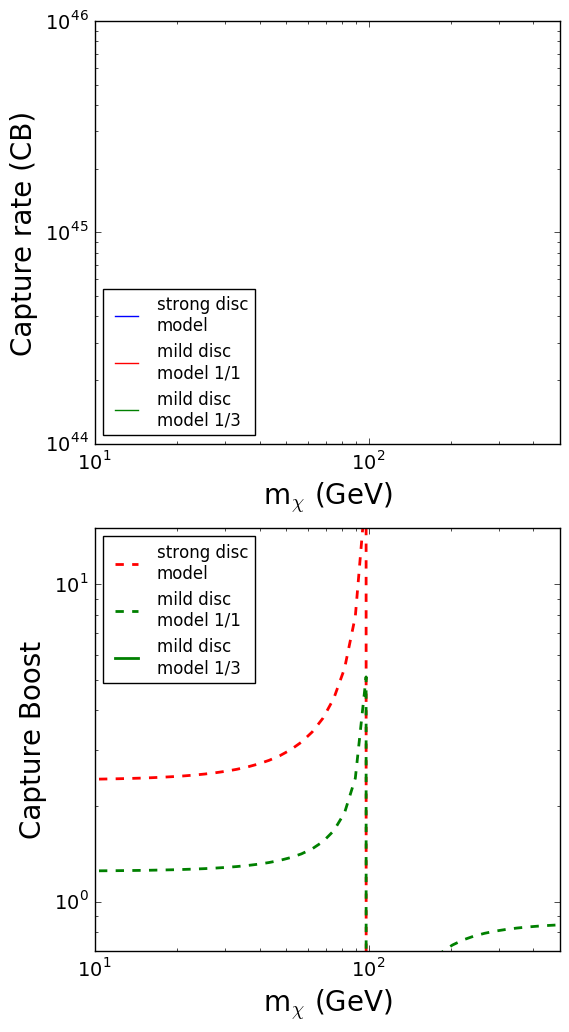

In [43]:
fig, [ax, ax2] = plt.subplots(2,1,figsize=(6,12)) 
ratio_strong = result_disc / result_SHM
ratio_mild1 = re_mild1 / result_SHM
ratio_mild3 = re_mild3 / result_SHM

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='minor', labelsize=14)

ax.set_xscale('log')
ax2.set_xscale('log')
ax.set_xlim([10,500])
ax2.set_xlim([10,500])
ax2.set_ylim([0.7,15])
ax.set_ylim([10e43,10e45])
ax.set_yscale('log')
ax2.set_yscale('log')
ax.set_xlabel(r'm$_{\chi}$ (GeV)', fontsize=20)
ax.set_ylabel(r'Capture rate (CB)', fontsize=20)
ax2.set_xlabel(r'm$_{\chi}$ (GeV)', fontsize=20)
ax2.set_ylabel(r'Capture Boost', fontsize=20)


ax.plot(m_array,result_disc, 'b',label='strong disc\nmodel')
ax.plot(m_array,re_mild1, 'r',label='mild disc\nmodel 1/1')
ax.plot(m_array,re_mild3, 'g',label='mild disc\nmodel 1/3')
ax.plot(m_array,result_SHM, 'k', linewidth = 2)

ax2.plot(m_array,ratio_strong, 'r--', linewidth = 2, label='strong disc\nmodel')
ax2.plot(m_array,ratio_mild1, 'g--', linewidth = 2, label='mild disc\nmodel 1/1')
ax2.plot(m_array,ratio_mild3, 'g-', linewidth = 2, label='mild disc\nmodel 1/3')

legend = ax.legend(loc='lower left', ncol=1, shadow=False, fontsize=12)
frame = legend.get_frame()

legend2 = ax2.legend(loc='upper left', ncol=1, shadow=False, fontsize=12)
frame = legend2.get_frame()

In [44]:
to_sigma = np.vectorize(captureSigma)
Sdisc1 = np.zeros(len(m_array))
mild11 = np.zeros(len(m_array))
mild31 = np.zeros(len(m_array))
SHM1 = np.zeros(len(m_array))

for i in range(0,len(sun)):
    print 'element--> ',sun[i][4]
    Sdisc1 += to_sigma(m_array,strong_DDSUN, i)
    SHM1 += to_sigma(m_array,standard_maxwellian, i)
    mild11 += to_sigma(m_array,mild_DD1SUN, i)
    mild31 += to_sigma(m_array,mild_DD3SUN, i)

element-->  H
element-->  He
element-->  C
element-->  N
element-->  O
element-->  Ne
element-->  Mg
element-->  S
element-->  Fe


In [45]:
first_term = [Sdisc1, mild11, mild31, SHM1]
second_term = [result_disc, re_mild1, re_mild3, result_SHM]

sigmas = [sigmaSD, sigmaMD1, sigmaMD3, sigmaSHM]

sigmaSD = sqrt(first_term[0] - (second_term[0]**2))
sigmaMD1 = sqrt(first_term[1] - (second_term[1]**2))
sigmaMD3 = sqrt(first_term[2] - (second_term[2]**2))
sigmaSHM = sqrt(first_term[3] - (second_term[3]**2))


NameError: name 'sigmaSD' is not defined

In [ ]:
def curva_y_sigma(ax, array, sigma, color, legenda):
    ax.plot(m_array,array, color,label=legenda)
    ax.plot(m_array,array+sigma, color+'--')
    ax.plot(m_array,array-sigma, color+'--')
    ax.fill_between(m_array,array+sigma, 
                    array, facecolor=color,alpha=0.05)
    ax.fill_between(m_array,array-sigma, 
                    array, facecolor=color,alpha=0.05)
    return 0

def layout(ax):
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.tick_params(axis='both', which='minor', labelsize=13)
    ax.set_ylim([10e43,10e45])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'm$_{\chi}$ (GeV)', fontsize=20)
    ax.set_ylabel(r'Capture rate', fontsize=20)
    legend = ax.legend(loc='lower left', ncol=1, shadow=False, fontsize=12)
    return 0

def layout_boost(ax):
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.tick_params(axis='both', which='minor', labelsize=13)
    #ax.set_ylim([0.7,15])
    #ax.set_xlim([10,500])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'm$_{\chi}$ (GeV)', fontsize=20)
    ax.set_ylabel(r'Capture Boost (CB)', fontsize=20)
    legend = ax.legend(loc='upper left', ncol=1, shadow=False, fontsize=12)
    return 0

def boost_sigma(cap_fun, sig_fun, cap_shm, sig_shm):
    return (sig_fun/cap_shm) - (cap_fun * sig_shm / (cap_shm**2))
    

In [ ]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=(12,12)) 



curva_y_sigma(ax1, result_disc, sigmaSD,'b',
              'strong dark\ndisc model')
curva_y_sigma(ax2, re_mild1, sigmaMD1,'g',
              'mild dark\ndisc model 1/1')
curva_y_sigma(ax3, re_mild3, sigmaMD3,'m',
              'mild dark\ndisc model 1/1')
curva_y_sigma(ax4, result_SHM, sigmaSHM,'k',
              'mild dark\ndisc model 1/1')

layout(ax1)
layout(ax2)
layout(ax3)
layout(ax4)

frame = legend.get_frame()


In [ ]:
fig, [ax1,ax2] = plt.subplots(2,1,figsize=(6,12)) 

curva_y_sigma(ax1, result_disc, sigmaSD,'b',
              'strong dark\ndisc model')
curva_y_sigma(ax1, re_mild1, sigmaMD1,'r',
              'mild dark\ndisc model 1/1')
curva_y_sigma(ax1, re_mild3, sigmaMD3,'g',
              'mild dark\ndisc model 1/3')
curva_y_sigma(ax1, result_SHM, sigmaSHM,'k',
              'Standard maxwellian\nmodel')
#ax1.set_xlim([10,500])
layout(ax1)


########## boost ###########################
sig_boostSD = boost_sigma(result_disc, sigmaSD,
                          result_SHM, sigmaSHM)
sig_boostMD1 = boost_sigma(re_mild1, sigmaMD1,
                          result_SHM, sigmaSHM)
sig_boostMD3 = boost_sigma(re_mild3, sigmaMD3,
                          result_SHM, sigmaSHM)

curva_y_sigma(ax2, ratio_strong, sig_boostSD,'b',
              'boost strong dark\ndisc model')
curva_y_sigma(ax2, ratio_mild1, sig_boostMD1,'r',
              'boost mild dark\ndisc model 1/1')
curva_y_sigma(ax2, ratio_mild3, sig_boostMD3,'g',
              'boost mild dark\ndisc model 1/3')
layout_boost(ax2)
